In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

airbnb = pd.read_csv('./listings_singapore.csv', delimiter=';')

In [2]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,71609,Villa in Singapore | *4.44 | 2 bedrooms | 3 be...,367042,Belinda,East Region,Tampines,134.537,10.395.887,Private room,150,92,20,17/01/2020,0.14,5,89,0,NaN
1,71896,Home in Singapore | *4.16 | 1 bedroom | 1 bed ...,367042,Belinda,East Region,Tampines,134.754,10.395.958,Private room,80,92,24,13/10/2019,0.16,5,89,0,NaN
2,71903,Home in Singapore | *4.41 | 1 bedroom | 2 beds...,367042,Belinda,East Region,Tampines,134.531,103.961,Private room,80,92,47,09/01/2020,0.31,5,89,0,NaN
3,275343,Rental unit in Singapore | *4.40 | 1 bedroom |...,1439258,Kay,Central Region,Bukit Merah,129.015,10.380.814,Private room,55,60,22,13/08/2022,0.17,52,275,0,S0399
4,275344,Rental unit in Singapore | *4.27 | 1 bedroom |...,1439258,Kay,Central Region,Bukit Merah,128.836,10.381.144,Private room,69,60,17,16/08/2023,0.12,52,274,3,S0399


In [3]:
print('shape: %s rows and %s cols' % airbnb.shape)

shape: 3483 rows and 18 cols


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3483 non-null   object 
 1   name                            3483 non-null   object 
 2   host_id                         3483 non-null   int64  
 3   host_name                       3483 non-null   object 
 4   neighbourhood_group             3483 non-null   object 
 5   neighbourhood                   3483 non-null   object 
 6   latitude                        3483 non-null   object 
 7   longitude                       3483 non-null   object 
 8   room_type                       3483 non-null   object 
 9   price                           3483 non-null   int64  
 10  minimum_nights                  3483 non-null   int64  
 11  number_of_reviews               3483 non-null   int64  
 12  last_review                     19

In [5]:
airbnb['neighbourhood_group'].unique()

array(['East Region', 'Central Region', 'North-East Region',
       'West Region', 'North Region'], dtype=object)

In [6]:
airbnb['neighbourhood'].unique()

array(['Tampines', 'Bukit Merah', 'Newton', 'River Valley', 'Serangoon',
       'Rochor', 'Kallang', 'Bukit Timah', 'Downtown Core',
       'Marine Parade', 'Outram', 'Bedok', 'Novena', 'Pasir Ris',
       'Ang Mo Kio', 'Bukit Batok', 'Hougang', 'Woodlands',
       'Singapore River', 'Queenstown', 'Museum', 'Tanglin', 'Toa Payoh',
       'Sembawang', 'Bishan', 'Yishun', 'Geylang', 'Jurong West',
       'Sengkang', 'Clementi', 'Jurong East', 'Punggol', 'Mandai',
       'Orchard', 'Choa Chu Kang', 'Bukit Panjang', 'Southern Islands',
       'Western Water Catchment', 'Tuas', 'Sungei Kadut', 'Pioneer',
       'Changi', 'Central Water Catchment', 'Marina South'], dtype=object)

In [7]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
# check for missing values
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1565
reviews_per_month                 1565
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2188
dtype: int64

In [9]:
# replace NaN value in reviews per month with 0 value.
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(value=0)

In [10]:
# drop license feature
del airbnb['license']

In [11]:
# check for duplicated values
airbnb[airbnb.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3167,"8,87E+17",Place to stay in Singapore | 1 bedroom | 1 bed...,512903502,The HANNAH,Central Region,Marine Parade,1.303.609,103.896.534,Private room,119,92,0,NaN,0.0,6,364,0
3169,"8,87E+17",Place to stay in Singapore | 1 bedroom | 1 bed...,512903502,The HANNAH,Central Region,Marine Parade,1.303.609,103.896.534,Private room,126,92,0,NaN,0.0,6,365,0


In [12]:
# remove duplicate 
airbnb = airbnb.drop_duplicates()

In [13]:
airbnb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
host_id,3481.0,1.542153e+08,1.528747e+08,23666.0,29032695.0,1.075995e+08,2.388916e+08,5.368571e+08
price,3481.0,2.875085e+02,1.941711e+03,13.0,80.0,1.640000e+02,2.700000e+02,1.099990e+05
minimum_nights,3481.0,6.726716e+01,6.689044e+01,1.0,6.0,9.200000e+01,9.200000e+01,1.000000e+03
number_of_reviews,3481.0,1.025510e+01,3.233211e+01,0.0,0.0,1.000000e+00,5.000000e+00,6.650000e+02
reviews_per_month,3481.0,3.075524e-01,8.904108e-01,0.0,0.0,2.000000e-02,2.100000e-01,2.093000e+01
calculated_host_listings_count,3481.0,5.083281e+01,7.233799e+01,1.0,3.0,1.300000e+01,7.000000e+01,2.530000e+02
availability_365,3481.0,2.356294e+02,1.447577e+02,0.0,90.0,3.120000e+02,3.640000e+02,3.650000e+02
number_of_reviews_ltm,3481.0,2.254812e+00,1.198041e+01,0.0,0.0,0.000000e+00,0.000000e+00,4.040000e+02


In [14]:
airbnb.to_csv('airbnb_listings_singapore.csv', index=False)

# Analysis and Viz

### What is the distribution of room types?

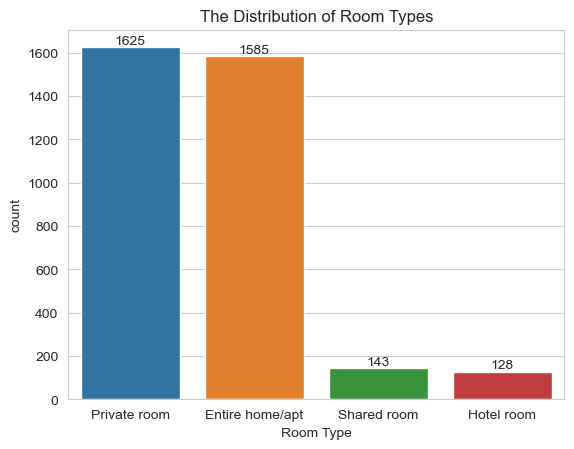

In [15]:
ax = sns.countplot(x=airbnb['room_type'])
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('The Distribution of Room Types')
plt.xlabel('Room Type')

# plt.savefig('distribution_room_types.png')
plt.show()

### Average listing price by room type

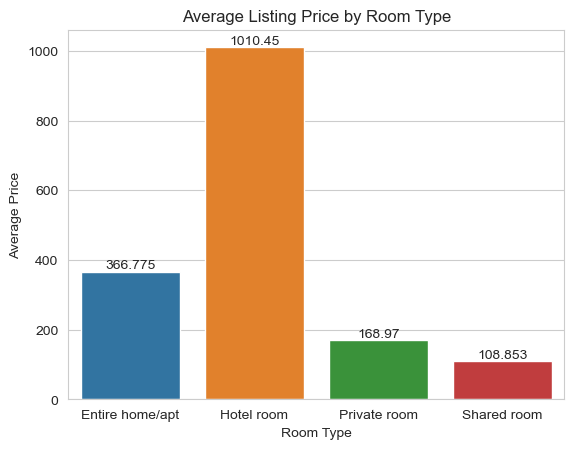

In [16]:
listing_price_mean = airbnb.groupby(['room_type'], as_index=False)['price'].mean()
# print(listing_price_mean)

ax = sns.barplot(data=listing_price_mean, x='room_type', y='price')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Average Listing Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

# plt.savefig('average_listing_price.png')
plt.show()

### How are prices varying based on the neighbourhood?

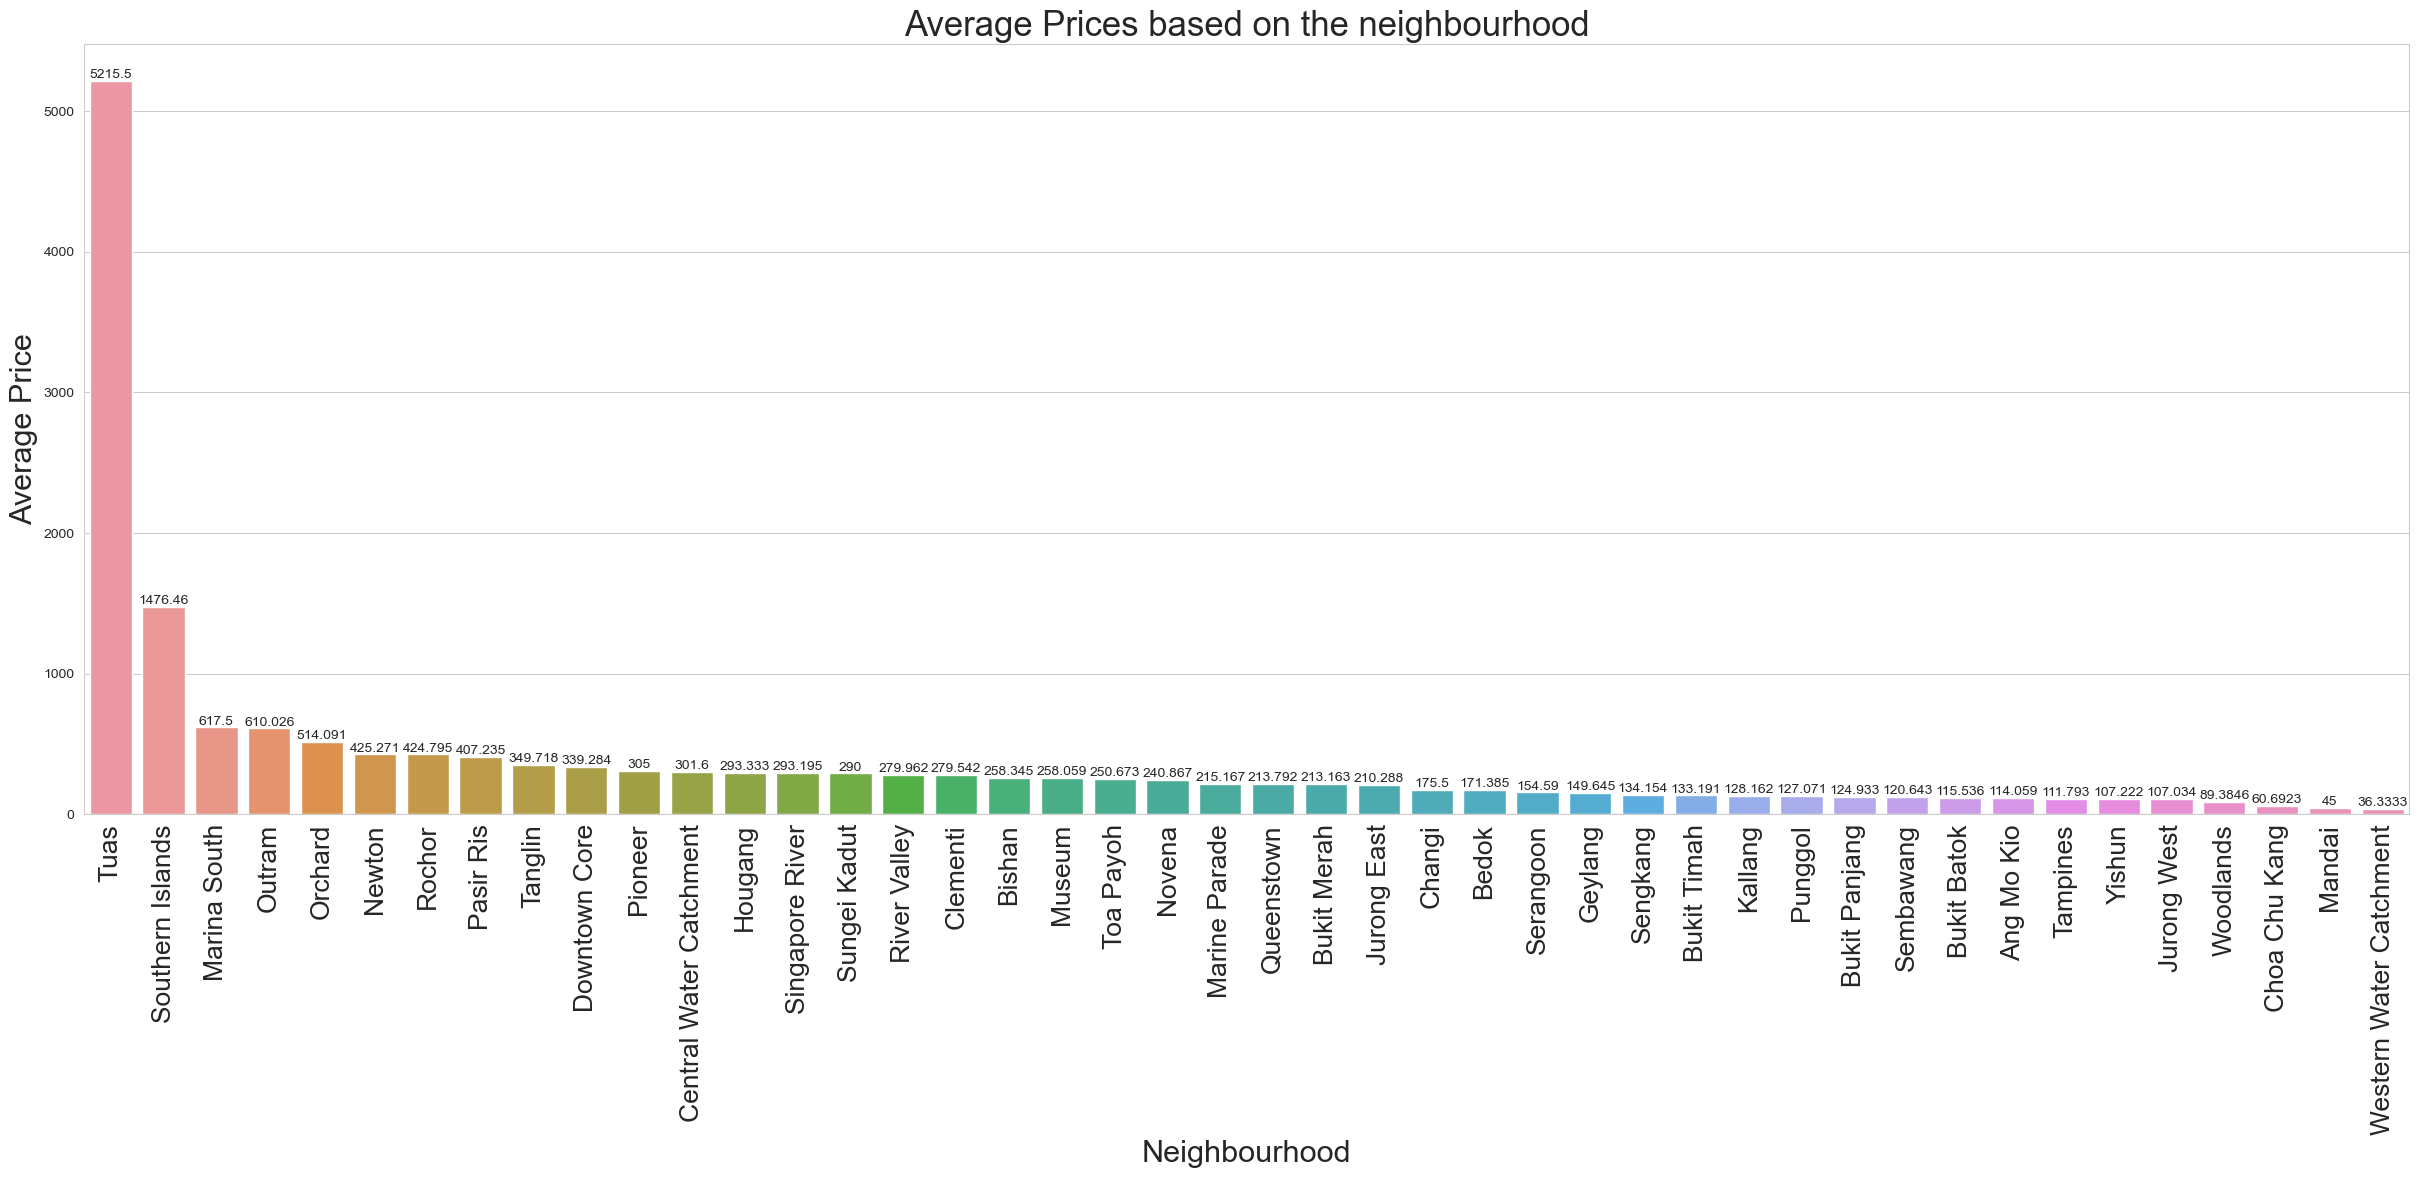

In [17]:
average_listings = airbnb.groupby('neighbourhood', as_index=False)['price'].mean()
sorted_avg_lists = average_listings.sort_values(by='price', ascending=False)
# print(sorted_avg_lists)

plt.figure(figsize=(30,10))
ax = sns.barplot(data=sorted_avg_lists, x='neighbourhood', y='price')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Average Prices based on the neighbourhood', fontsize=25)
plt.xlabel('Neighbourhood', fontsize=22)
plt.ylabel('Average Price', fontsize=22)
plt.xticks(fontsize=19, rotation=90)

# plt.savefig('average_prices_neighbourhood.png')
plt.show()

### Total listings based on neighbourhood_group and neighbourhood

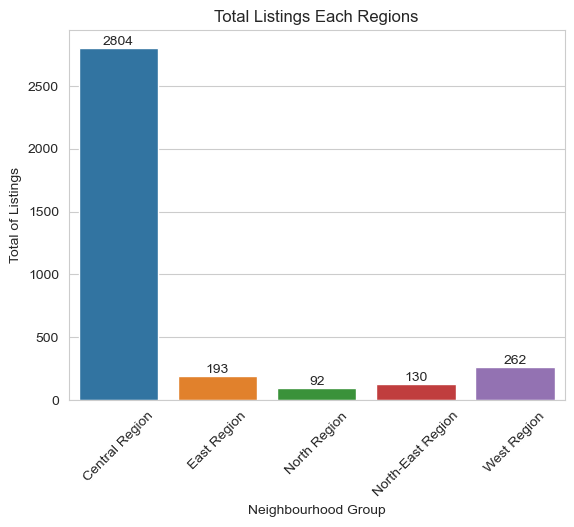

In [18]:
listings_regions = airbnb.groupby('neighbourhood_group', as_index=False)['neighbourhood_group'].value_counts()

ax = sns.barplot(data=listings_regions, x='neighbourhood_group', y='count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Total Listings Each Regions')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total of Listings')
plt.xticks(rotation=45)

# plt.savefig('total_listings_regions.png')
plt.show()

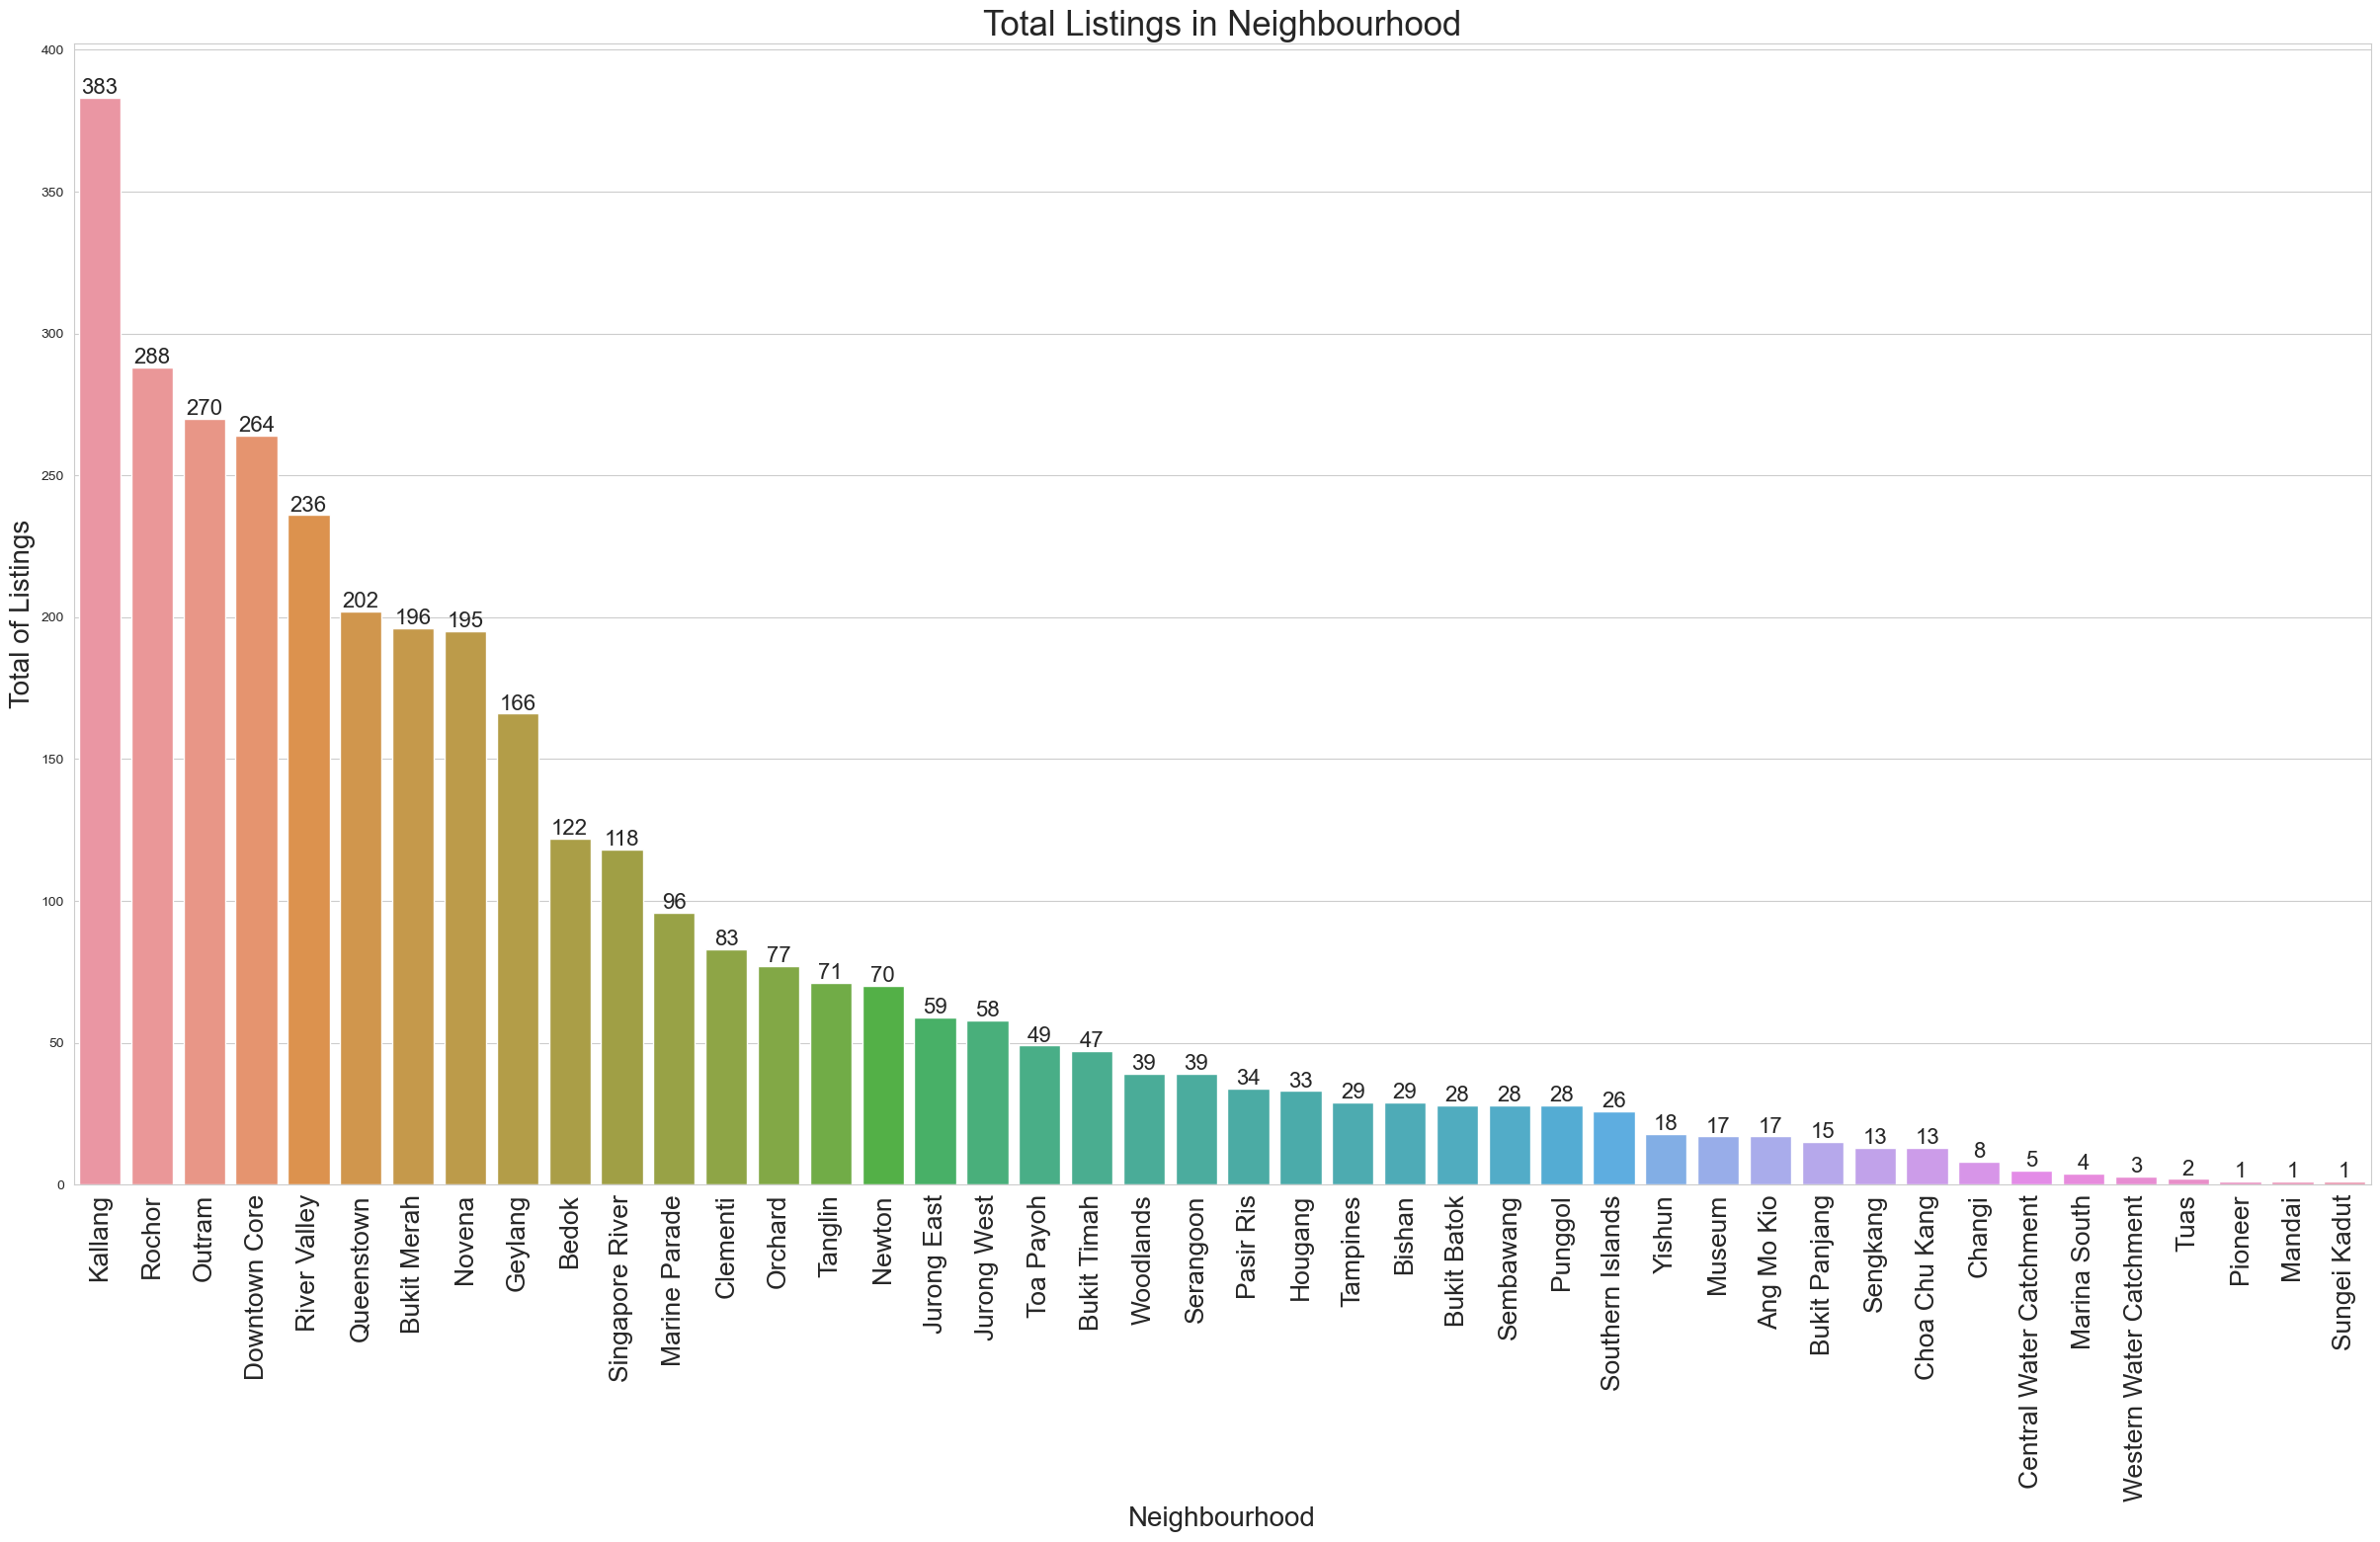

In [19]:
listings_neighbour = airbnb.groupby('neighbourhood', as_index=False)['neighbourhood'].value_counts()
sorted_listings_neighbour = listings_neighbour.sort_values(by='count', ascending=False)
# print(sorted_listings_neighbour)

plt.figure(figsize=(30,15))
ax = sns.barplot(data=sorted_listings_neighbour, x='neighbourhood', y='count')
for i in ax.containers:
    ax.bar_label(i, fontsize=16)
    
plt.title('Total Listings in Neighbourhood', fontsize=25)
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Total of Listings', fontsize=20)
plt.xticks(fontsize=19, rotation=90)

# plt.savefig('total_listings_neighbourhood.png')
plt.show()

### Which listings are the most expensive?

In [20]:
listings_most_expensive = airbnb[['name','host_name','room_type','price','minimum_nights']]
sorted_listings_price = listings_most_expensive.sort_values(by='price', ascending=False)
sorted_listings_price.head(10)

,name,host_name,room_type,price,minimum_nights
639,Hostel in Singapore | *3.80 | 1 bedroom | 3 be...,Beary Best Hostel,Hotel room,109999,1
671,Condo in Singapore | *5.0 | 2 bedrooms | 1 bed...,Jj,Entire home/apt,10286,92
503,Home in Singapore | 3 bedrooms | 4 beds | 3.5 ...,Darren,Entire home/apt,8900,92
2973,Hotel in Singapore | Studio | 2 beds | 1 share...,Village Hotel Albert Court,Private room,8429,1
2972,Hotel in Singapore | Studio | 1 bed | 1 shared...,Village Hotel Albert Court,Private room,8423,1
2971,Hotel in Singapore | Studio | 1 bed | 1 shared...,Village Hotel Albert Court,Private room,8340,1
2970,Hotel in Singapore | Studio | 1 bed | 1 shared...,Village Hotel Albert Court,Private room,8316,1
627,Serviced apartment in Singapore | 1 bedroom | ...,Syafiqah,Entire home/apt,7515,1
2976,Hotel in Singapore | Studio | 1 bed | 1 shared...,Village Hotel Albert Court,Private room,7484,1
404,Rental unit in Singapore | *4.50 | 1 bedroom |...,Michael,Entire home/apt,7286,92


### Which listings have the most reviews?

In [21]:
listings_most_reviews = airbnb[['name','host_name','room_type','price','minimum_nights','number_of_reviews']]
sorted_listings_reviews = listings_most_reviews.sort_values(by='number_of_reviews', ascending=False)
sorted_listings_reviews.head(10)

,name,host_name,room_type,price,minimum_nights,number_of_reviews
2039,Boutique hotel in Tanjong Pagar | *4.77 | Stud...,Ling,Private room,99,1,665
2049,Boutique hotel in Little India | *4.36 | Studi...,Alex,Private room,140,1,407
56,Townhouse in Singapore | *4.93 | 1 bedroom | 3...,Shirley,Entire home/apt,185,92,369
204,Serviced apartment in Orchard | *4.71 | Studi...,Thanksgivings,Entire home/apt,272,6,299
131,Home in Singapore | *4.84 | 1 bedroom | 1 bed ...,Eddie,Private room,60,92,296
2044,Boutique hotel in Chinatown | *4.70 | Studio |...,Fang,Private room,113,1,295
89,Aparthotel in Singapore | *4.78 | Studio | 1 b...,Heritage,Entire home/apt,161,1,292
130,Home in Singapore | *4.82 | 1 bedroom | 1 bed ...,Eddie,Private room,70,92,286
1826,Boutique hotel in Bugis | *4.81 | 1 bedroom | ...,Low,Private room,97,1,283
345,Rental unit in Singapore | *4.84 | 2 bedrooms ...,Sk,Private room,64,92,274


### Which hosts have the most listings? (Top hosts)

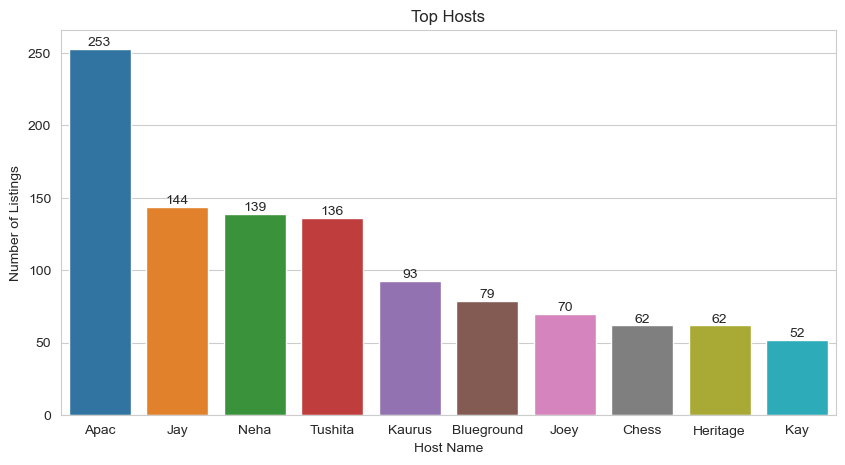

In [22]:
top_hosts = airbnb.groupby('host_id')['host_name'].value_counts().reset_index(name='counts')
top_hosts = top_hosts.sort_values(by='counts', ascending=False)
top_hosts.head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_hosts[:10], x='host_name', y='counts')
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Top Hosts')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')

# plt.savefig('top_hosts.png')
plt.show()